In [1]:
#!pip install --upgrade pip
#!pip install pyjarowinkler
#!pip install opencv-python
#!pip3 install lmdb pillow nltk natsort
#!pip install craft-text-detector==0.3.1
#!pip install pandas

In [1]:
import glob

In [2]:
%pwd

'/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR'

In [3]:
from craft_text_detector import Craft
output_dir = '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output'
cuda = False

In [4]:
%cd  /Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/images
image_filenames = glob.glob('./*')
image_filenames

/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/images


['./demo_10.jpg',
 './demo_4.png',
 './demo_5.png',
 './demo_7.png',
 './demo_6.png',
 './demo_2.jpg',
 './demo_3.png',
 './demo_1.png',
 './demo_8.jpg',
 './demo_9.jpg']

In [5]:
craft = Craft(output_dir,
              crop_type='poly', 
              cuda=False, 
              export_extra=True, 
              refiner=True,
              text_threshold=0.7,
              link_threshold=0.4,
              low_text=0.4)

In [6]:
%cd /Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/images

for image_filename in image_filenames: 
    craft.detect_text(image_filename);
    print(image_filename)

/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/images
./demo_10.jpg
./demo_4.png
./demo_5.png
./demo_7.png
./demo_6.png
./demo_2.jpg
./demo_3.png
./demo_1.png
./demo_8.jpg
./demo_9.jpg


/opt/anaconda3/envs/casaai2020/lib/python3.8/site-packages/craft_text_detector/craft_utils.py:380: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys = np.array(polys)
/opt/anaconda3/envs/casaai2020/lib/python3.8/site-packages/craft_text_detector/predict.py:107: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  polys_as_ratio = np.array(polys_as_ratio)


In [7]:
# unload models from ram/gpu
craft.unload_craftnet_model()
craft.unload_refinenet_model()

In [8]:
#!git clone https://github.com/clovaai/deep-text-recognition-benchmark
%cd /Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/deep-text-recognition-benchmark

/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/deep-text-recognition-benchmark


In [9]:
crop_dir_names = glob.glob('/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/*crops')

In [10]:
crop_dir_names

['/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_6_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_2_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_7_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_5_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_1_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_3_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_9_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_10_crops',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_8_crops']

### copy demo.py from craft/deep-text-recognition-benchmark to your envrironment directory like C:\toolkits.win\anaconda3\envs\craft\bin\

cp sandbox/CAS_AI_2020_2021/20210216_craft_OCR/deep-text-recognition-benchmark/demo.py /opt/anaconda3/envs/casaai2020/bin/.

In [11]:
outputs = []
for crop_dir_name in crop_dir_names:
    output = !/opt/anaconda3/envs/casaai2020/bin/python demo.py \
    --Transformation TPS --FeatureExtraction ResNet --SequenceModeling BiLSTM --Prediction Attn --sensitive\
    --image_folder $crop_dir_name/ \
    --saved_model TPS-ResNet-BiLSTM-Attn-case-sensitive.pth
    print(crop_dir_name)
    outputs.append(output)

/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_6_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_2_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_7_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_5_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_1_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_3_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_9_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_10_crops
/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_8_crops


In [12]:
outputs[0]

['model input parameters 32 100 20 1 512 256 96 25 TPS ResNet BiLSTM Attn',
 'loading pretrained model from TPS-ResNet-BiLSTM-Attn-case-sensitive.pth',
 '--------------------------------------------------------------------------------',
 'image_path               \tpredicted_labels         \tconfidence score',
 '--------------------------------------------------------------------------------',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops/crop_0.png\t*                        \t0.4132',
 '/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops/crop_1.png\tGreenstead               \t0.9998']

In [13]:
len(outputs)

10

In [14]:
from IPython.core.display import display, HTML
from PIL import Image
import base64
import io
import pandas as pd

appended_data = []

for output in outputs:
    for ind, row in enumerate(output[output.index('image_path               \tpredicted_labels         \tconfidence score')+2:]):
        row = row.split('\t')
        filename = row[0].strip()
        label = row[1].strip()
        conf = row[2].strip()
        img = Image.open(filename)
        img_buffer = io.BytesIO()
        img.save(img_buffer, format="PNG")
        imgStr = base64.b64encode(img_buffer.getvalue()).decode("utf-8") 
        data = pd.DataFrame()
        data.loc[ind, 'img'] = '<img src="data:image/png;base64,{0:s}">'.format(imgStr)
        data.loc[ind, 'id'] = filename
        data.loc[ind, 'label'] = label
        data.loc[ind, 'conf'] = conf
        appended_data.append(data)

appended_data = pd.concat(appended_data)
html_all = appended_data.to_html(escape=False)


,img,id,label,conf
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops/crop_0.png,*,0.4132
1,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_4_crops/crop_1.png,Greenstead,0.9998
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_6_crops/crop_0.png,MERRY,0.9676
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_2_crops/crop_0.png,SHAKESHACK,0.9146
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_7_crops/crop_0.png,underground,0.9998
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_5_crops/crop_0.png,TOAST,0.5511
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_1_crops/crop_0.png,Available,0.9998
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_3_crops/crop_0.png,London,0.9172
0,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_9_crops/crop_0.png,BALLYS,0.7957
1,,/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/20210216_craft_OCR/craft_output/demo_9_crops/crop_1.png,STATIONENTRANCE,0.6168

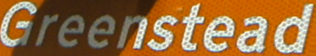
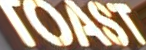
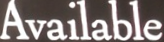
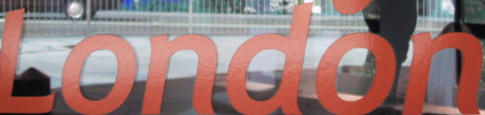
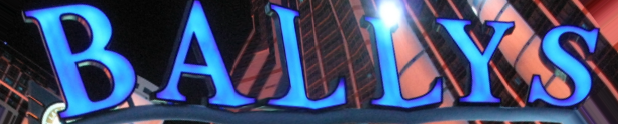
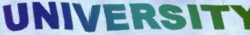

In [15]:
display(HTML(html_all))

In [16]:
appended_data.head(10)

,img,id,label,conf
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,*,0.4132
1,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,Greenstead,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,MERRY,0.9676
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,SHAKESHACK,0.9146
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,underground,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,TOAST,0.5511
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,Available,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,London,0.9172
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,BALLYS,0.7957
1,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,STATIONENTRANCE,0.6168


In [17]:
appended_data.sort_values('conf', ascending=False)

,img,id,label,conf
1,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,Greenstead,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,underground,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,Available,0.9998
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,UNIVERSITY,0.9982
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,MERRY,0.9676
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,London,0.9172
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,SHAKESHACK,0.9146
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,BALLYS,0.7957
1,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,STATIONENTRANCE,0.6168
0,"<img src=""data:image/png;base64,iVBORw0KGgoAAA...",/Users/cedricmoullet/sandbox/CAS_AI_2020_2021/...,RONALDO,0.5988


In [18]:
import numpy as np
result = appended_data.copy()
col = result['id'].str.split('/')

In [19]:
col = [np.array(l)[[6,7]] for l in col]

In [20]:
col = ['-'.join(l) for l in col]

In [21]:
result.id = col

In [22]:
result.drop('img', axis=1, inplace=True)

In [23]:
result.reset_index(inplace=True, drop=True)

In [24]:
result.head(20)

,id,label,conf
0,craft_output-demo_4_crops,*,0.4132
1,craft_output-demo_4_crops,Greenstead,0.9998
2,craft_output-demo_6_crops,MERRY,0.9676
3,craft_output-demo_2_crops,SHAKESHACK,0.9146
4,craft_output-demo_7_crops,underground,0.9998
5,craft_output-demo_5_crops,TOAST,0.5511
6,craft_output-demo_1_crops,Available,0.9998
7,craft_output-demo_3_crops,London,0.9172
8,craft_output-demo_9_crops,BALLYS,0.7957
9,craft_output-demo_9_crops,STATIONENTRANCE,0.6168


In [25]:
result.conf = result.conf.astype(float)

#### Test Hamming Distance

In [26]:

def hamming(str1, str2):

    score = 0

    for (a, b) in zip(str1, str2):
        a_bits = bin(ord(a))[2:].zfill(8)
        b_bits = bin(ord(b))[2:].zfill(8)

        score += sum(bx != by for bx, by in zip(a_bits, b_bits))
    return score

In [27]:
# not sufficient accuracy
hamming('itl', 'Italy')

4

In [28]:
#!pip install xlrd

In [29]:
result.head(5)

,id,label,conf
0,craft_output-demo_4_crops,*,0.4132
1,craft_output-demo_4_crops,Greenstead,0.9998
2,craft_output-demo_6_crops,MERRY,0.9676
3,craft_output-demo_2_crops,SHAKESHACK,0.9146
4,craft_output-demo_7_crops,underground,0.9998


## Test Jaro Distance to correct labels using dictionaries 

In [30]:
from pyjarowinkler import distance
distance.get_jaro_distance("250", "enthält", winkler=True, scaling=0.1)

0.0

In [31]:
distance.get_jaro_distance('max', 'maxii', winkler=True, scaling=0.1)

0.91

In [32]:
def get_best_match(label, collection, threshold):
    found = NOT_FOUND
    distances = []
    for elem in collection:
        dist = distance.get_jaro_distance(label, elem, winkler=True, scaling=0.1)
        distances.append(dist)
        
    distances = np.array(distances)
    print(distances)
    dist = max(distances)
    print(dist, 'max likelyhood of match')
    
    if dist > threshold:
        index = np.argmax(distances)
        print(index, 'index of max distance')
        
        found = collection[index]
        print(found, 'is the matched element')
    return found
            